# Question 1

![blah](HW2_Q1.png)

# Question 2

![blah](HW2_Q2.png)

# Question 3

![blah](HW2_Q3.png)

# Question 4

## (a)

In [127]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

wine = pd.read_csv("winequality-red.csv", delimiter = ";")
wine.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


## (b)

In [128]:
X = np.array(wine.iloc[:, :-1])
y = np.array(wine.iloc[:, 11])


X_train, X_sub, y_train, y_sub = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_sub, y_sub, test_size = 15/25, random_state = 42)

## (c)

The closed form solution to the sum of square error function is given by: $$\beta = (X^TX)^{-1} X^T y.$$

In [131]:
#SSE algorithm trainer
def SSE(X, y):
    beta = LA.inv(X.T @ X) @ X.T @ y
    return beta


[ 3.19457033e-03 -1.02208859e+00 -1.35187029e-01  1.34793780e-04
 -1.78090495e+00  5.19502700e-03 -3.70824267e-03  4.20796084e+00
 -4.42831022e-01  7.92848115e-01  3.04980738e-01]


In [132]:
#solve for beta
beta = SSE(X_train, y_train)
print(beta)

[ 3.19457033e-03 -1.02208859e+00 -1.35187029e-01  1.34793780e-04
 -1.78090495e+00  5.19502700e-03 -3.70824267e-03  4.20796084e+00
 -4.42831022e-01  7.92848115e-01  3.04980738e-01]


## (d)

In [133]:
y_train_pred = X_train @ SSE(X_train, y_train)

Text(0.5, 0, 'Actual Wine Quality (train)')

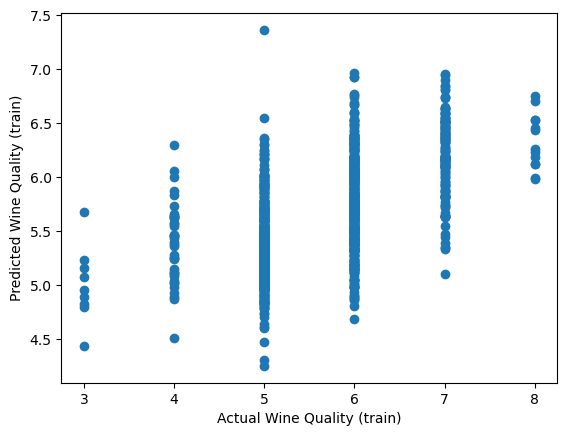

In [135]:
plt.scatter(y_train, y_train_pred)
plt.ylabel("Predicted Wine Quality (train)")
plt.xlabel("Actual Wine Quality (train)")

The plot compares the real wine quality to the predicted wine quality. Since the graph shows the actual wine quality matching similarly to the predicted, it shows that the model trained can somewhat predict the actual wine quality well. The values of the predicted seem to follow closely when the quality is 6 but deviates slightly in more extreme points like 3 and 8.

## (e)

- The root MSE calculator is first built

In [136]:
#MSE function
def mse(pred, target):
    val = sum( np.square( (pred @ beta) - target ) )
    return val / 2

#root mean square function
def rootmse(pred, target):
    return np.sqrt(2 * mse(pred, target) / len(pred))
    



0.6539565424645601

In [165]:
#training
mse_training = rootmse(X_train, y_train)
print(f"The root mean square for the training set is {mse_training}")


The root mean square for the training set is 0.6539565424645601


In [164]:
#testing
mse_test = rootmse(X_test, y_test)
print(f"The root mean square for the testing set is {mse_test}")

The root mean square for the testing set is 0.6148418450930844


## (f)

In [120]:
#LMS function algorithm
def LMS(X, y, iter = 5000, step = 0.0001):
    #initialize w0
    w = np.random.uniform(-10, 10, X.shape[1])
    
    for i in range(iter): 
        n = np.random.randint(0, X.shape[0]-1) #set random vector
        error = y[n] - (w.T @ X_train[n]) #error term
        w = w + (step * error * X_train[n]) #update weights
    return w




In [158]:
iteration = 1500000
stepsize = 0.00005
theta = LMS(X_train, y_train, iteration, stepsize)
theta

array([ 2.29865209e-01, -6.46486905e-01, -6.05719229e-01, -1.10729496e-02,
        6.52855202e+00, -3.40328939e-03,  2.13325857e-03, -8.19187225e+00,
        2.06600758e+00,  1.50472571e-01,  4.49630069e-01])

The results of theta can be plotted once again to check rough accuracy of the predictions compared to the actual values of the wine quality.

Text(0.5, 0, 'Actual Wine Quality (train)')

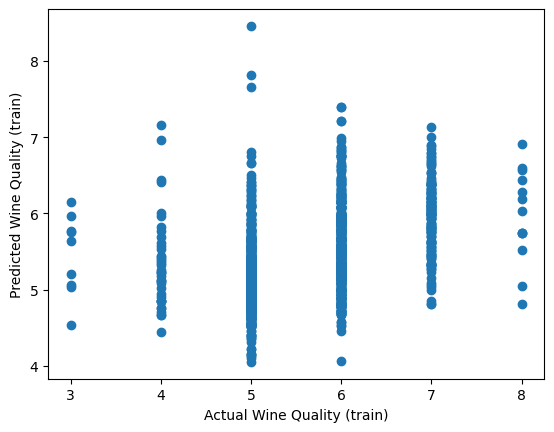

In [159]:
y_train_pred_theta = X_train @ theta
plt.scatter(y_train, y_train_pred_theta)
plt.ylabel("Predicted Wine Quality (train)")
plt.xlabel("Actual Wine Quality (train)")

## (g)

- The root mse calculator for the LMS is built first

In [160]:
#train
#MSE function
def mse_LMS(pred, target):
    val = sum( np.square( (pred @ theta) - target ) )
    return val / 2

#root mean square function
def rootmse_LMS(pred, target):
    return np.sqrt(2 * mse_LMS(pred, target) / len(pred))

In [163]:
#training
mse_LMS_training = rootmse_LMS(X_train, y_train)
print(f"The root mean square for the training set is {mse_LMS_training}")

The root mean square for the training set is 0.8057296854787833


In [166]:
#testing
mse_LMS_test = rootmse_LMS(X_test, y_test)
print(f"The root mean square for the testing set is {mse_LMS_test}")

The root mean square for the testing set is 0.8103672352456553
